In [1]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import uuid
from datetime import datetime, timedelta


In [2]:
# Abrir registro_compra_actividad.xlsx 
df = pd.read_excel('registro_compra_actividad.xlsx')



In [3]:
df.columns

Index(['date', 'HORA', 'session_id', 'device_id', 'device_type', 'os',
       'date_id', 'quantity', 'abandonment_time', 'ID_Product', 'Category',
       'Price', 'Discount', 'Tax', 'Stock Level', 'Cuestomer ID',
       'Customer Age', 'Age', 'Age Group', 'Location', 'gender', 'Id_compra',
       'Supplier ID', 'Shipping Cost', 'Shipping Method', 'Rate',
       'Seasonality', 'Popularity', 'reviewId', 'content', 'score',
       'thumbsUpCount', 'at', 'replyContent'],
      dtype='object')

In [4]:
# Poner solo NaN en las columnas específicas ()
df[['reviewId', 'content', 'score', 'thumbsUpCount', 'at', 'replyContent', 'session_id', 'device_id','Id_compra','date_id' , 'date', 'Cuestomer ID']] = np.nan

In [5]:
# Generar edades para la columna Age dependiendo de intervalo de la columna Age Group
# Función para generar edades según el grupo
def generate_age(age_group):
    if not isinstance(age_group, str):  # Si no es string, devolver NaN
        return np.nan  
    
    if '+' in age_group:  # Caso "55+"
        try:
            lower_bound = int(age_group.split('+')[0])
            upper_bound = lower_bound + 35  # Permitimos edades hasta ~90+
            mode = lower_bound + 10  # Sesgo hacia los primeros 10 años del grupo
        except ValueError:
            return np.random.randint(18, 60)  # Default si hay error
    
    elif '-' in age_group:  # Caso "XX-YY"
        try:
            lower, upper = map(int, age_group.split('-'))
            mode = lower + (upper - lower) * 0.3  # Sesgo hacia la parte baja del grupo
        except ValueError:
            return np.random.randint(18, 60)  # Default si hay error

    else:  # Para casos como "Other"
        return int(np.random.triangular(18, 30, 60))  # Más probabilidades en los 30s
    
    # Generar edad sesgada usando distribución triangular
    return int(np.random.triangular(lower if '-' in age_group else lower_bound, mode, upper if '-' in age_group else upper_bound))

# Aplicar la función a la columna Age Group
df['Age'] = df['Age Group'].apply(generate_age)

In [6]:
#Generar datos (Tablet, Mobile, Desktop) para device_type y reemplazar 'rellenar' 
# Función para reemplazar 'rellenar' por un valor aleatorio
def fill_device_type(device):
    if device == 'rellenar':
        return np.random.choice(['Mobile', 'Desktop', 'Tablet'], p=[0.6, 0.3, 0.1])  # Pesos asignados
    return device


# Aplicar la función
df['device_type'] = df['device_type'].apply(fill_device_type)

In [7]:
#Generar datos para os y reemplazar 'rellenar'
# Función para asignar sistema operativo según el tipo de dispositivo
def assign_os(device_type):
    if device_type == 'Desktop':
        return np.random.choice(['Windows', 'macOS', 'Linux'], p=[0.8, 0.19, 0.01]) # Pesos asignados
    elif device_type == 'Tablet':
        return np.random.choice(['iPadOS', 'Android'], p=[0.66, 0.34])
    elif device_type == 'Mobile':
        return np.random.choice(['iOS', 'Android'], p=[0.586, 0.414] )
    else:
        return np.nan  # Por si acaso

# Aplicar la función
df['os'] = df['device_type'].apply(assign_os)

In [8]:
# Poner la columna date en el mismo formalo de fecha
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')



In [9]:
#Generar datos para la columna 'data' para reemplazar NAs Min: 2023-01-01T00:00:00 Max: 2024-01-01T00:00:00
# Función para reemplazar NAs por fechas aleatorias
import numpy as np
import pandas as pd

# Fijar semilla para reproducibilidad
random_state = 42
rng = np.random.default_rng(random_state)

# Fechas festivas con mayor probabilidad
high_prob_months = [1, 4, 8, 12]  # Enero, Abril, Agosto, Diciembre
low_prob_months = [2, 3, 5, 6, 7, 9, 10, 11]  # Otros meses

# Total de probabilidades para meses festivos y otros meses
high_prob_total = 0.8  # 80% de probabilidad para meses festivos
low_prob_total = 0.2   # 20% de probabilidad para otros meses

high_prob_weights = [high_prob_total/len(high_prob_months)] * len(high_prob_months)  # 0.2 cada uno # Mayor probabilidad en meses festivos
low_prob_weights = [low_prob_total/len(low_prob_months)] * len(low_prob_months)      # 0.025 cada uno # Menor probabilidad en otros meses
# Probabilidades ajustadas (sumando exactamente 1)

# Función para generar fechas aleatorias con sesgo hacia temporadas festivas
def fill_date(date):
    if pd.isna(date):  
        # Elegimos el mes con ponderaciones ajustadas
        month = rng.choice(high_prob_months + low_prob_months, p=high_prob_weights + low_prob_weights)
        day = rng.integers(1, 29)  # Evita problemas con febrero
        year = 2023  # Aseguramos que esté en el rango 2023-01-01 a 2024-01-01
        
        # Generar una hora aleatoria
        hour = rng.integers(0, 24)
        minute = rng.integers(0, 60)
        second = rng.integers(0, 60)

        return pd.Timestamp(year, month, day, hour, minute, second)
    
    return date  # Mantiene la fecha original si no es NaN

# Aplicar la función
df['date'] = df['date'].apply(fill_date)


In [10]:
df

,date,HORA,session_id,device_id,device_type,os,date_id,quantity,abandonment_time,ID_Product,...,Shipping Method,Rate,Seasonality,Popularity,reviewId,content,score,thumbsUpCount,at,replyContent
0,2023-12-19 10:25:51,rellenar,NaN,NaN,Tablet,Android,NaN,4.0,7/13/2023,Jacket,...,Standard,4.49,Yes,56,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-12-06 02:31:58,rellenar,NaN,NaN,Desktop,Windows,NaN,2.0,2023-07-11 00:00:00,Camera,...,Overnight,16.11,No,79,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-21 18:30:07,rellenar,NaN,NaN,Mobile,iOS,NaN,2.0,2023-03-03 00:00:00,Sneakers,...,Standard,4.93,No,40,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-15 08:10:55,rellenar,NaN,NaN,Mobile,Android,NaN,2.0,NaN,Cookbooks,...,Standard,1.31,No,93,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-12-12 19:32:26,rellenar,NaN,NaN,Tablet,iPadOS,NaN,3.0,7/22/2023,Camera,...,Overnight,4.37,No,56,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023-04-08 05:40:21,rellenar,NaN,NaN,Mobile,iOS,NaN,NaN,NaN,Graphic Novels,...,Express,10.87,No,21,NaN,NaN,NaN,NaN,NaN,NaN
999996,2023-12-28 23:06:40,rellenar,NaN,NaN,Desktop,Windows,NaN,NaN,NaN,Biographies,...,Overnight,19.19,No,59,NaN,NaN,NaN,NaN,NaN,NaN
999997,2023-01-11 22:33:23,rellenar,NaN,NaN,Mobile,Android,NaN,NaN,NaN,Formal Shoes,...,Express,8.77,Yes,12,NaN,NaN,NaN,NaN,NaN,NaN
999998,2023-08-22 11:52:35,rellenar,NaN,NaN,Mobile,Android,NaN,NaN,NaN,Jeans,...,Standard,11.27,Yes,44,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Extraer la hora de la columna 'date' y ponerla en la columna HORA
df['HORA'] = df['date'].dt.hour

In [12]:
#Generar codigo alfanumerico para la columna session_id
# Función para generar códigos alfanuméricos
def generate_session_id():
    return ''.join(np.random.choice(list('0123456789abcdef'), size=16))

# Aplicar la función
df['session_id'] = df['session_id'].apply(lambda x: generate_session_id() if pd.isna(x) else x)

In [13]:
#Generar coidgo alfanumerico para la columna device_id dependiendo del device_type
# Función mejorada para generar device_id según device_type
def generate_device_id(device_type):
    if device_type == 'Desktop':
        prefix = 'D-'  # Prefijo para Desktop
        return prefix + ''.join(np.random.choice(list('0123456789abcdef'), size=14))
    elif device_type == 'Tablet':
        prefix = 'T-'  # Prefijo para Tablet
        return prefix + ''.join(np.random.choice(list('0123456789ABCDEF'), size=14))  # Letras mayúsculas
    elif device_type == 'Mobile':
        prefix = 'M-'  # Prefijo para Mobile
        return prefix + ''.join(np.random.choice(list('stuvwxyz0123456789'), size=14))
    else:
        return np.nan  # Valor nulo si el tipo de dispositivo no es reconocido
    
# Aplicar la función
df['device_id'] = df['device_type'].apply(generate_device_id)


In [14]:
# Generar datos para quantity Min 1, Max 20, mientras mayor es quantity menos posible es que se genere aleatoriamente
def generate_quantity(quantity):
    if pd.isna(quantity):  # Revisar si es None o NaN
        valores = list(range(1, 21))  # Rango de valores de 1 a 20
        pesos = [20 - i for i in valores]  # Pesos decrecientes: 1 tiene mayor peso, 20 menor
        return random.choices(valores, weights=pesos, k=1)[0]  # Elegir según los pesos
    return quantity

# Aplicar la función
df['quantity'] = df['quantity'].apply(generate_quantity)

In [15]:
# Generar codigo alfanumerico para date_id

# Función mejorada para generar date_id basado en la fecha
def generate_date_id(date):
    if pd.isna(date):  # Si la fecha es NaN, devolver un valor nulo
        return None  
    date_str = str(date).replace('-', '')  # Convertir la fecha a string y quitar guiones
    unique_part = str(uuid.uuid4())[:4]  # Usar solo los primeros 4 caracteres de un UUID
    return f"D-{date_str}-{unique_part}"  # Generar un ID estructurado

# Aplicar la función
df['date_id'] = df['date'].apply(generate_date_id)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1000000 non-null  datetime64[ns]
 1   HORA              1000000 non-null  int32         
 2   session_id        1000000 non-null  object        
 3   device_id         1000000 non-null  object        
 4   device_type       1000000 non-null  object        
 5   os                1000000 non-null  object        
 6   date_id           1000000 non-null  object        
 7   quantity          1000000 non-null  float64       
 8   abandonment_time  2524 non-null     object        
 9   ID_Product        1000000 non-null  object        
 10  Category          1000000 non-null  object        
 11  Price             1000000 non-null  float64       
 12  Discount          1000000 non-null  int64         
 13  Tax               1000000 non-null  int64  

In [17]:
#Cambiar Product ID por	Product Name
df = df.rename(columns={'ID_Product': 'Product Name'})

In [18]:
#Abrir diversified_ecommerce_dataset.csv 
df1 = pd.read_csv('diversified_ecommerce_dataset.csv')

In [19]:
#Agregar la columna Product ID a df
df['Product ID'] = df1['Product ID']


In [20]:
# Generar codigo alfanumerico para 'Cuestomer ID'
#Funcion para generar codigo alfanumerico para 'Cuestomer ID'

def generate_customer_id():
    return ''.join(np.random.choice(list('0123456789abcdef'), size=16))

# Aplicar la función

df['Cuestomer ID'] = df['Cuestomer ID'].apply(lambda x: generate_customer_id() if pd.isna(x) else x)


In [21]:
# drop Customer Age

df = df.drop('Customer Age', axis=1)

In [22]:
df.columns

Index(['date', 'HORA', 'session_id', 'device_id', 'device_type', 'os',
       'date_id', 'quantity', 'abandonment_time', 'Product Name', 'Category',
       'Price', 'Discount', 'Tax', 'Stock Level', 'Cuestomer ID', 'Age',
       'Age Group', 'Location', 'gender', 'Id_compra', 'Supplier ID',
       'Shipping Cost', 'Shipping Method', 'Rate', 'Seasonality', 'Popularity',
       'reviewId', 'content', 'score', 'thumbsUpCount', 'at', 'replyContent',
       'Product ID'],
      dtype='object')

In [24]:
df[['date', 'HORA', 'session_id', 'device_id', 'device_type', 'os',
       'date_id', 'quantity', 'abandonment_time', 'Product ID', 'Product Name', 'Category',
       'Price', 'Discount', 'Tax', 'Stock Level', 'Cuestomer ID',
        'Age', 'Age Group', 'Location', 'gender', 'Id_compra',
       'Supplier ID', 'Shipping Cost', 'Shipping Method', 'Rate',
       'Seasonality', 'Popularity', 'reviewId', 'content', 'score',
       'thumbsUpCount', 'at', 'replyContent'
    
]]

,date,HORA,session_id,device_id,device_type,os,date_id,quantity,abandonment_time,Product ID,...,Shipping Method,Rate,Seasonality,Popularity,reviewId,content,score,thumbsUpCount,at,replyContent
0,2023-12-19 10:25:51,10,5a2bf5eb822d1548,T-2A3152D60A2005,Tablet,Android,D-20231219 10:25:51-3296,4.0,7/13/2023,P6879,...,Standard,4.49,Yes,56,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-12-06 02:31:58,2,28d7c767b72b05f2,D-a4df4ee88ef4a6,Desktop,Windows,D-20231206 02:31:58-bf4f,2.0,2023-07-11 00:00:00,P5132,...,Overnight,16.11,No,79,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-21 18:30:07,18,770dd8d16a9227af,M-531t1ysu06zuyu,Mobile,iOS,D-20231221 18:30:07-9221,2.0,2023-03-03 00:00:00,P2941,...,Standard,4.93,No,40,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08-15 08:10:55,8,5fd002a15a571c09,M-8536wz4w4yv4yu,Mobile,Android,D-20230815 08:10:55-ef17,2.0,NaN,P8545,...,Standard,1.31,No,93,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-12-12 19:32:26,19,0697923e72c753be,T-B84DD43DA568DA,Tablet,iPadOS,D-20231212 19:32:26-0084,3.0,7/22/2023,P4594,...,Overnight,4.37,No,56,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023-04-08 05:40:21,5,b7a35bd95ba3c4c4,M-zt9st939zt1935,Mobile,iOS,D-20230408 05:40:21-9c7b,1.0,NaN,P1024,...,Express,10.87,No,21,NaN,NaN,NaN,NaN,NaN,NaN
999996,2023-12-28 23:06:40,23,b8129f249e3e2c54,D-fc2a04fe0307eb,Desktop,Windows,D-20231228 23:06:40-5cf9,12.0,NaN,P2259,...,Overnight,19.19,No,59,NaN,NaN,NaN,NaN,NaN,NaN
999997,2023-01-11 22:33:23,22,9e4f634c8ded230f,M-uyv7szw320t848,Mobile,Android,D-20230111 22:33:23-2039,10.0,NaN,P1110,...,Express,8.77,Yes,12,NaN,NaN,NaN,NaN,NaN,NaN
999998,2023-08-22 11:52:35,11,93a6c5b33254258a,M-2u455wx697x337,Mobile,Android,D-20230822 11:52:35-cd02,14.0,NaN,P5954,...,Standard,11.27,Yes,44,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Generar Id_compra alfanumerico 

def generate_id_compra():
    return ''.join(np.random.choice(list('0123456789abcdef'), size=16))

# Aplicar la función

df['Id_compra'] = df['Id_compra'].apply(lambda x: generate_id_compra() if pd.isna(x) else x)


In [28]:
# Codigo para generar reviews
from datetime import datetime, timedelta
import uuid
class DataFrameReviewGenerator:
    def __init__(self):
        self.comentarios_por_categoria = {
            "Apparel": [
                "La prenda es perfecta para el clima de {location}. {extra_comment}",
                "El material es de excelente calidad y {extra_comment}",
                "El ajuste es exactamente como esperaba. {extra_comment}",
                "Los acabados son impecables y {extra_comment}",
                "La talla es precisa y {extra_comment}"
            ],
            "Electronics": [
                "Este dispositivo superó mis expectectativas. {extra_comment}",
                "La calidad del producto es excepcional. {extra_comment}",
                "Funciona perfectamente y {extra_comment}",
                "Excelente relación calidad-precio. {extra_comment}",
                "Una compra muy satisfactoria. {extra_comment}"
            ],
            "Footwear": [
                "El calzado es muy cómodo y {extra_comment}",
                "El diseño es espectacular. {extra_comment}",
                "Excelente calidad de materiales. {extra_comment}",
                "Muy buena experiencia de compra. {extra_comment}",
                "Perfectos para uso diario. {extra_comment}"
            ],
            "Books": [
                "El contenido es muy interesante y {extra_comment}",
                "Excelente material de lectura. {extra_comment}",
                "La calidad de impresión es muy buena. {extra_comment}",
                "Muy satisfecho con la compra. {extra_comment}",
                "Una adición valiosa a mi biblioteca. {extra_comment}"
            ],
            "default": [
                "Muy satisfecho con el producto. {extra_comment}",
                "Buena relación calidad-precio. {extra_comment}",
                "El producto cumple con lo esperado. {extra_comment}",
                "Recomendable para otros compradores. {extra_comment}",
                "Una compra acertada. {extra_comment}"
            ]
        }

        self.comentarios_adicionales = {
            "positivo": [
                "el envío fue muy rápido",
                "el servicio al cliente fue excelente",
                "la calidad es excepcional",
                "definitivamente lo recomendaría",
                "volvería a comprarlo"
            ],
            "negativo": [
                "el envío tardó más de lo esperado",
                "el precio podría ser mejor",
                "hay algunos detalles por mejorar",
                "esperaba un poco más",
                "la entrega tuvo algunos contratiempos"
            ]
        }

        self.respuestas_soporte = [
                "Gracias por su comentario. Nos motiva saber que tuvo una buena experiencia.",
                "Apreciamos mucho su reseña. ¡Esperamos servirle nuevamente pronto!",
                "Nos alegra saber que quedó satisfecho. ¡Gracias por su confianza!",
                "Su opinión es muy valiosa para nosotros. ¡Gracias por compartirla!",
                "Gracias por tomarse el tiempo de dejarnos su reseña. ¡Nos impulsa a mejorar cada día!",
                "¡Nos encanta saber que está satisfecho! Gracias por elegirnos.",
                "Siempre es un placer atenderle. ¡Gracias por sus palabras!",
                "Nos complace saber que su experiencia fue positiva. ¡Gracias por su apoyo!",
                "Agradecemos sinceramente su comentario. ¡Esperamos verle pronto!",
                "¡Muchas gracias por su valoración! Seguiremos trabajando para ofrecerle el mejor servicio."
        ]

    def generar_contenido(self, row):
        """Genera el contenido de la reseña basado en los datos del producto."""
        categoria = row['Category']
        location = row['Location']
        score = row['score']  # Asumimos que ya existe el score

        # Seleccionar comentario base según la categoría
        comentarios_categoria = self.comentarios_por_categoria.get(
            categoria, 
            self.comentarios_por_categoria['default']
        )
        comentario_base = random.choice(comentarios_categoria)

        # Seleccionar comentario adicional según el score
        tipo_comentario = "positivo" if score >= 7 else "negativo"
        extra_comment = random.choice(self.comentarios_adicionales[tipo_comentario])

        # Formatear el comentario completo
        return comentario_base.format(location=location, extra_comment=extra_comment)

    def obtener_timestamp(self, fecha_str, hora):
        """Convierte la fecha y hora en timestamp, manejando correctamente la hora 24."""
        # Extraer solo la fecha del string
        fecha_base = datetime.strptime(fecha_str.split()[0], '%Y-%m-%d')
        
        # Si la hora es 24, la convertimos a 0 del día siguiente
        hora_int = int(hora)
        if hora_int == 24:
            fecha_base = fecha_base + timedelta(days=1)
            hora_int = 0
        
        # Agregar la hora
        fecha_con_hora = fecha_base.replace(hour=hora_int)
        
        # Agregar variación aleatoria de minutos y segundos
        minutos = random.randint(0, 59)
        segundos = random.randint(0, 59)
        fecha_final = fecha_con_hora.replace(minute=minutos, second=segundos)
        
        return int(fecha_final.timestamp() * 1000)

    def generar_reviews(self, df):
        """Genera todas las reviews para el DataFrame."""
        # Copiar el DataFrame para no modificar el original
        df_new = df.copy()
        
        # Generar datos para cada fila
        for index, row in df_new.iterrows():
            try:
                # Generar reviewId si no existe
                if pd.isna(df_new.at[index, 'reviewId']):
                    df_new.at[index, 'reviewId'] = f"REV-{uuid.uuid4().hex[:10]}"
                
                # Generar score si no existe (basado en popularidad)
                if pd.isna(df_new.at[index, 'score']):
                    base_score = min(10, max(1, round(float(row['Popularity']) / 10)))
                    df_new.at[index, 'score'] = random.randint(max(1, base_score - 2), 
                                                             min(10, base_score + 2))
                
                # Generar content
                if pd.isna(df_new.at[index, 'content']):
                    df_new.at[index, 'content'] = self.generar_contenido(df_new.loc[index])
                
                # Generar thumbsUpCount si no existe
                if pd.isna(df_new.at[index, 'thumbsUpCount']):
                    df_new.at[index, 'thumbsUpCount'] = random.randint(0, 
                                                       max(1, int(float(row['Popularity']) / 2)))
                
                # Generar timestamp si no existe
                if pd.isna(df_new.at[index, 'at']):
                    df_new.at[index, 'at'] = self.obtener_timestamp(str(row['date']), row['HORA'])
                
                # Generar replyContent si no existe
                if pd.isna(df_new.at[index, 'replyContent']) and random.random() > 0.3:
                    df_new.at[index, 'replyContent'] = random.choice(self.respuestas_soporte)
                    
            except Exception as e:
                print(f"Error en fila {index}: {e}")
                print(f"Valores de la fila: {row}")
                continue

        return df_new

def actualizar_reviews_df(df):
    """Función principal para actualizar el DataFrame con reviews."""
    generador = DataFrameReviewGenerator()
    return generador.generar_reviews(df)

In [29]:
# Actualizar el DataFrame con las reviews generadas
df_actualizado = actualizar_reviews_df(df)

# Ver ejemplos de las reseñas generadas
print(df_actualizado[['Product Name', 'content', 'score', 'thumbsUpCount', 'replyContent']].head())

C:\Users\jose-\AppData\Local\Temp\ipykernel_13040\3011076034.py:125: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'REV-b35ad9b64c' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.at[index, 'reviewId'] = f"REV-{uuid.uuid4().hex[:10]}"
C:\Users\jose-\AppData\Local\Temp\ipykernel_13040\3011076034.py:135: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'La prenda es perfecta para el clima de New York, USA. la calidad es excepcional' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.at[index, 'content'] = self.generar_contenido(df_new.loc[index])
C:\Users\jose-\AppData\Local\Temp\ipykernel_13040\3011076034.py:148: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '¡Nos encanta saber que est

  Product Name                                            content  score  \
0       Jacket  La prenda es perfecta para el clima de New Yor...    8.0   
1       Camera  Funciona perfectamente y el servicio al client...   10.0   
2     Sneakers  El calzado es muy cómodo y el precio podría se...    5.0   
3    Cookbooks  Excelente material de lectura. definitivamente...    8.0   
4       Camera  Funciona perfectamente y hay algunos detalles ...    6.0   

   thumbsUpCount                                       replyContent  
0           24.0  ¡Nos encanta saber que está satisfecho! Gracia...  
1            9.0                                                NaN  
2            6.0  Agradecemos sinceramente su comentario. ¡Esper...  
3           41.0                                                NaN  
4            8.0  ¡Muchas gracias por su valoración! Seguiremos ...  


In [30]:
df_actualizado

,date,HORA,session_id,device_id,device_type,os,date_id,quantity,abandonment_time,Product Name,...,Rate,Seasonality,Popularity,reviewId,content,score,thumbsUpCount,at,replyContent,Product ID
0,2023-12-19 10:25:51,10,5a2bf5eb822d1548,T-2A3152D60A2005,Tablet,Android,D-20231219 10:25:51-3296,4.0,7/13/2023,Jacket,...,4.49,Yes,56,REV-b35ad9b64c,La prenda es perfecta para el clima de New Yor...,8.0,24.0,1.702999e+12,¡Nos encanta saber que está satisfecho! Gracia...,P6879
1,2023-12-06 02:31:58,2,28d7c767b72b05f2,D-a4df4ee88ef4a6,Desktop,Windows,D-20231206 02:31:58-bf4f,2.0,2023-07-11 00:00:00,Camera,...,16.11,No,79,REV-38a794ceef,Funciona perfectamente y el servicio al client...,10.0,9.0,1.701850e+12,NaN,P5132
2,2023-12-21 18:30:07,18,770dd8d16a9227af,M-531t1ysu06zuyu,Mobile,iOS,D-20231221 18:30:07-9221,2.0,2023-03-03 00:00:00,Sneakers,...,4.93,No,40,REV-08c167388d,El calzado es muy cómodo y el precio podría se...,5.0,6.0,1.703202e+12,Agradecemos sinceramente su comentario. ¡Esper...,P2941
3,2023-08-15 08:10:55,8,5fd002a15a571c09,M-8536wz4w4yv4yu,Mobile,Android,D-20230815 08:10:55-ef17,2.0,NaN,Cookbooks,...,1.31,No,93,REV-75430a5d17,Excelente material de lectura. definitivamente...,8.0,41.0,1.692107e+12,NaN,P8545
4,2023-12-12 19:32:26,19,0697923e72c753be,T-B84DD43DA568DA,Tablet,iPadOS,D-20231212 19:32:26-0084,3.0,7/22/2023,Camera,...,4.37,No,56,REV-92920284b5,Funciona perfectamente y hay algunos detalles ...,6.0,8.0,1.702429e+12,¡Muchas gracias por su valoración! Seguiremos ...,P4594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023-04-08 05:40:21,5,b7a35bd95ba3c4c4,M-zt9st939zt1935,Mobile,iOS,D-20230408 05:40:21-9c7b,1.0,NaN,Graphic Novels,...,10.87,No,21,REV-93f1642155,Excelente material de lectura. la entrega tuvo...,1.0,9.0,1.680951e+12,Nos complace saber que su experiencia fue posi...,P1024
999996,2023-12-28 23:06:40,23,b8129f249e3e2c54,D-fc2a04fe0307eb,Desktop,Windows,D-20231228 23:06:40-5cf9,12.0,NaN,Biographies,...,19.19,No,59,REV-3905e82ddc,Muy satisfecho con la compra. esperaba un poco...,4.0,10.0,1.703823e+12,¡Nos encanta saber que está satisfecho! Gracia...,P2259
999997,2023-01-11 22:33:23,22,9e4f634c8ded230f,M-uyv7szw320t848,Mobile,Android,D-20230111 22:33:23-2039,10.0,NaN,Formal Shoes,...,8.77,Yes,12,REV-e1db0c9972,Perfectos para uso diario. esperaba un poco más,2.0,3.0,1.673492e+12,NaN,P1110
999998,2023-08-22 11:52:35,11,93a6c5b33254258a,M-2u455wx697x337,Mobile,Android,D-20230822 11:52:35-cd02,14.0,NaN,Jeans,...,11.27,Yes,44,REV-b24230772b,El ajuste es exactamente como esperaba. hay al...,6.0,5.0,1.692723e+12,Apreciamos mucho su reseña. ¡Esperamos servirl...,P5954


In [31]:
#Print el peso en MBs de df_actualizado

import sys

size_in_bytes = sys.getsizeof(df_actualizado)

size_in_megabytes = size_in_bytes / (1024 * 1024)

size_in_megabytes



1438.48699092865

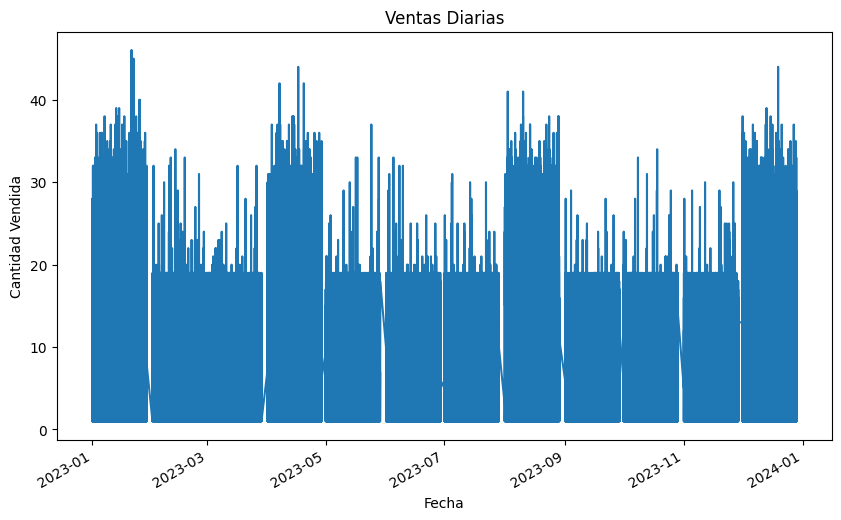

In [32]:
# Ventas diarias
ventas_diarias = df.groupby('date')['quantity'].sum()
plt.figure(figsize=(10, 6))
ventas_diarias.plot(kind='line')
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()


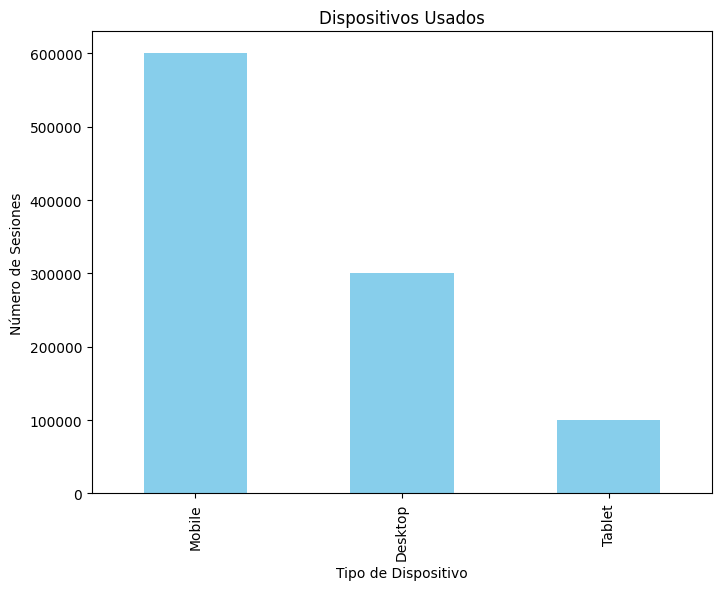

In [33]:
# Dispositivos usados
dispositivos_usados = df['device_type'].value_counts()
plt.figure(figsize=(8, 6))
dispositivos_usados.plot(kind='bar', color='skyblue')
plt.title('Dispositivos Usados')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Número de Sesiones')
plt.show()

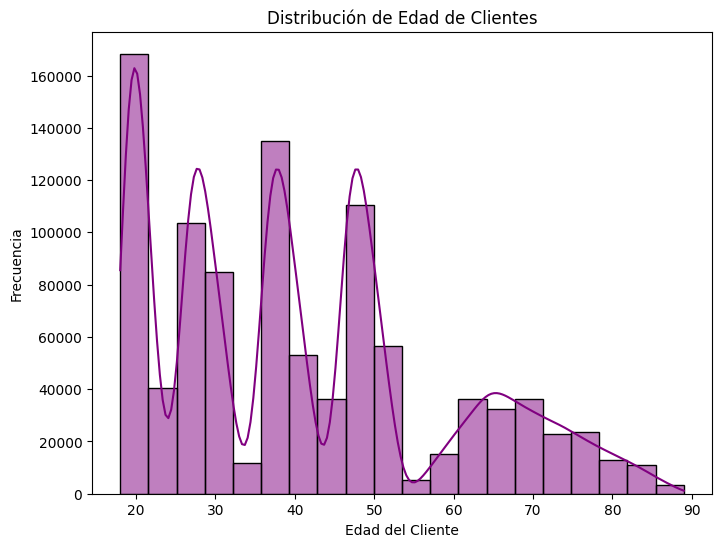

In [ ]:
# Distribución de edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.show()

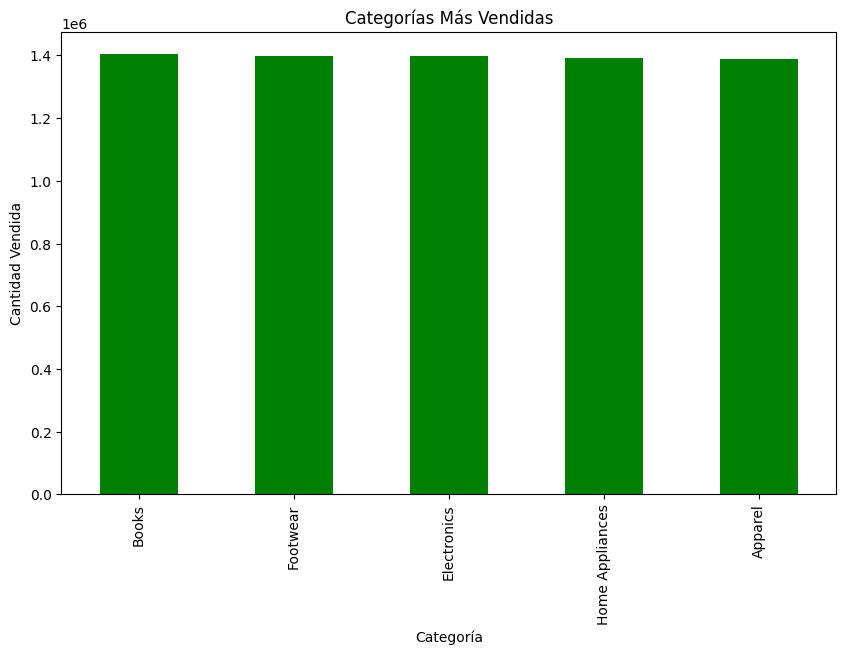

In [ ]:
# Categorías más vendidas
categorias_vendidas = df.groupby('Category')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
categorias_vendidas.plot(kind='bar', color='green')
plt.title('Categorías Más Vendidas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.show()


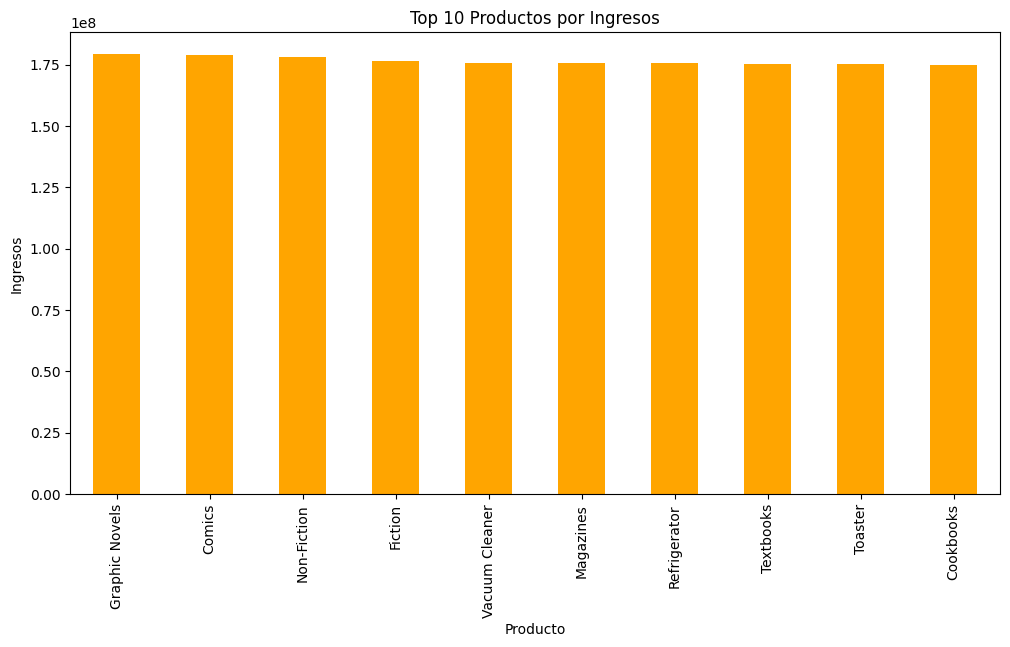

In [ ]:
# Ingresos por producto
df['Revenue'] = df['Price'] * df['quantity']
ingresos_por_producto = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
ingresos_por_producto.plot(kind='bar', color='orange')
plt.title('Top 10 Productos por Ingresos')
plt.xlabel('Producto')
plt.ylabel('Ingresos')
plt.show()

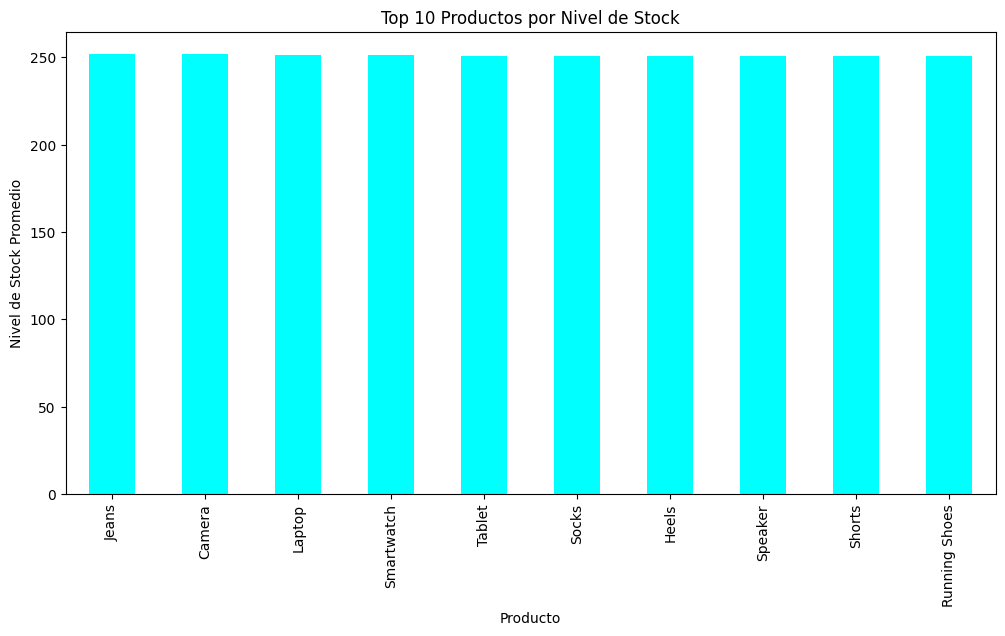

In [ ]:
# Nivel de stock
nivel_stock = df.groupby('Product Name')['Stock Level'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
nivel_stock.plot(kind='bar', color='cyan')
plt.title('Top 10 Productos por Nivel de Stock')
plt.xlabel('Producto')
plt.ylabel('Nivel de Stock Promedio')
plt.show()